In [1]:
# Import Dependecies
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import sklearn

In [2]:
# Connect to google drive if using colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load images in folder and return images as a list
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
    return images

In [4]:
# Upload sets
imagesVic = load_images_from_folder("/content/drive/MyDrive/Queen Anne architecture")
imagesTud = load_images_from_folder("/content/drive/MyDrive/Tudor Revival architecture")
imagesCra = load_images_from_folder("/content/drive/MyDrive/American craftsman style")

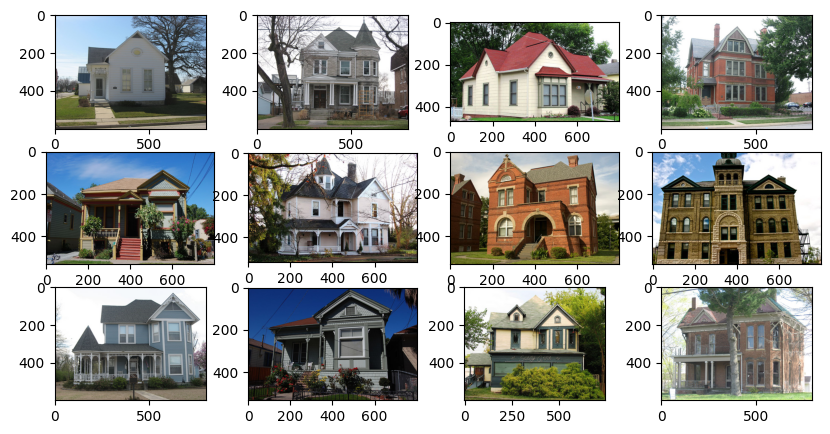

In [5]:
fig = plt.figure(figsize=(10, 5))
rows = 3
columns = 4

# Displays the first images from your list
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(imagesVic[i-1])
plt.show()

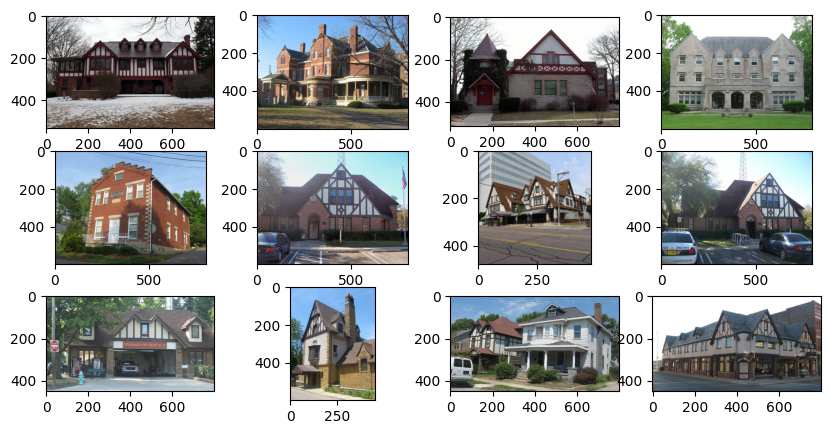

In [6]:
fig = plt.figure(figsize=(10, 5))
rows = 3
columns = 4

# Displays the first 9 images from your list
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(imagesTud[i-1])
plt.show()

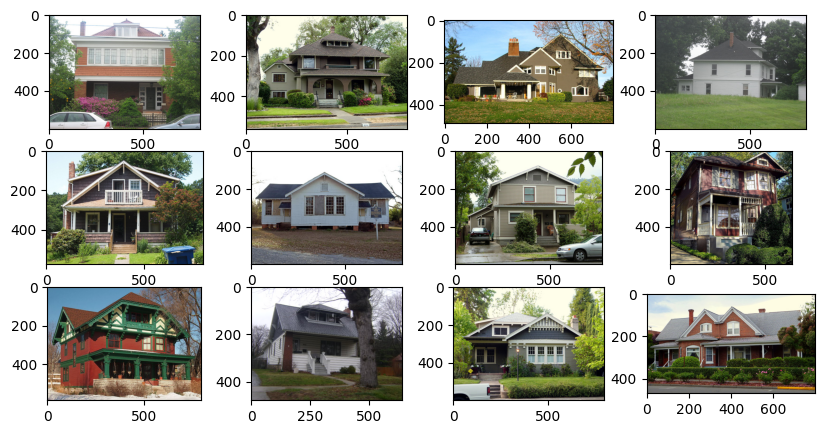

In [7]:
fig = plt.figure(figsize=(10, 5))
rows = 3
columns = 4

# Displays the first 9 images from your list
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(imagesCra[i-1])
plt.show()

In [22]:
# Convert images to numpy arrays
numpy_imagesVic = [np.array(img) for img in imagesVic]

# Example: resizing images to 32x32
resized_imagesVic = []
for img in numpy_imagesVic:
    resized_img = cv2.resize(img, (200, 200))
    if resized_img.shape == (200, 200, 3):
        resized_imagesVic.append(resized_img)

# Example: normalize pixel values to [0, 1]
normalized_imagesVic = [img / 255.0 for img in resized_imagesVic]

# Convert images to a tensor
VicTensor = np.stack(normalized_imagesVic, axis=0)

# Generate list of 0's to serve as label in data set
# Victorian = 0
Vic = [0]*VicTensor.shape[0]

In [21]:
numpy_imagesVic[300].shape

(480, 640, 3)

In [23]:
# Convert images to numpy arrays
numpy_imagesTud = [np.array(img) for img in imagesTud]

# Example: resizing images to 100x100
numpy_imagesTud = [cv2.resize(img, (200, 200)) for img in numpy_imagesTud]

# Example: normalize pixel values to [0, 1]
numpy_imagesTud = [img / 255.0 for img in numpy_imagesTud]
TudTensor = np.stack(numpy_imagesTud, axis=0)

# Generate list of 0's to serve as label in data set
# Tudor = 1
Tud = [1]*TudTensor.shape[0]

In [24]:
# Convert images to numpy arrays
numpy_imagesCra = [np.array(img) for img in imagesCra]

# Example: resizing images to 32x32
numpy_imagesCra = [cv2.resize(img, (200, 200)) for img in numpy_imagesCra]

# Example: normalize pixel values to [0, 1]
numpy_imagesCra = [img / 255.0 for img in numpy_imagesCra]
CraTensor = np.stack(numpy_imagesCra, axis=0)

# Generate list of 0's to serve as label in data set
# Craftsman = 2
Cra = [2]*CraTensor.shape[0]

In [25]:
X = np.concatenate((VicTensor, TudTensor, CraTensor))
y = np.concatenate((Vic, Tud, Cra))

In [12]:
# from imblearn.over_sampling import RandomOverSampler

# # Create the RandomOverSampler object
# oversampler = RandomOverSampler(random_state=42)

# # Reshape the features if needed (e.g., for image data)
# X = X.reshape(len(X), -1)

# # Apply Random Oversampling
# X_resampled, y_resampled = oversampler.fit_resample(X, y)

# # Print the new class distribution
# print("Class distribution after oversampling:", np.bincount(y_resampled))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model
model = keras.Sequential([
    keras.layers.Conv2D(100, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/50


In [ ]:
# # Convert images to numpy arrays and resize them to 32x32
# numpy_imagesVic = [cv2.resize(np.array(img), (32, 32)) for img in imagesVic]
# numpy_imagesTud = [cv2.resize(np.array(img), (32, 32)) for img in imagesTud]
# numpy_imagesCra = [cv2.resize(np.array(img), (32, 32)) for img in imagesCra]

# # Normalize pixel values to [0, 1]
# numpy_imagesVic = [img / 255.0 for img in numpy_imagesVic]
# numpy_imagesTud = [img / 255.0 for img in numpy_imagesTud]
# numpy_imagesCra = [img / 255.0 for img in numpy_imagesCra]

# # Convert numpy arrays to tensors and generate labels
# VicTensor = np.array(numpy_imagesVic)
# TudTensor = np.array(numpy_imagesTud)
# CraTensor = np.array(numpy_imagesCra)

# # Generate labels for the tensors
# # Victorian = 0, Tudor = 1, Craftsman = 2
# VicLabels = np.zeros(VicTensor.shape[0], dtype=int)
# TudLabels = np.ones(TudTensor.shape[0], dtype=int)
# CraLabels = np.full(CraTensor.shape[0], 2, dtype=int)